In [6]:
import os
import json

def read_json(file):
  with open(file, 'r') as f:
    return json.load(f)
    
def write_json(file, data):
  with open(file, 'w') as f:
    json.dump(data, f, indent=4)
    
root_folder = os.path.abspath('.')
data_output_folder = os.path.join(root_folder, 'output')
folder_to_process = os.path.join(data_output_folder, os.path.join('wildtrack', 'smpl'))

keypoints3d_folder = os.path.join(data_output_folder, os.path.join('wildtrack', 'keypoints3d'))
# Load the data

data = {}

for file in os.listdir(folder_to_process):
  if file.endswith('.json'):
    file_id = int(file.split('.')[0])
    data[file_id] = read_json(os.path.join(folder_to_process, file))
    keypoints_allpids = read_json(os.path.join(keypoints3d_folder, file))
    
    for i, pers_kp in enumerate(zip(data[file_id], keypoints_allpids)):
      pers, kp = pers_kp
      assert pers['id'] == kp['id']
      data[file_id][i]['keypoints3d'] = kp['keypoints3d']
      

"""
[
    {
        "id": 0,
        "Rh": [

          [1.438, 0.024, 0.148]

        ],
        "Th": [

          [-1.884, 2.025, 1.058]

        ],
        "poses": [

          [-0.230, -0.048, 0.060, -0.269, -0.014, -0.071, 0.240, 0.028, -0.004, 0.799, -0.051, -0.197, 0.329, -0.078, 0.066, 0.243, -0.049, 0.032, -0.029, 0.047, -0.099, -0.081, -0.178, 0.028, 0.042, -0.029, 0.019, -0.264, 0.201, 0.194, -0.017, 0.083, -0.163, 0.116, 0.174, 0.025, 0.068, -0.244, -0.384, 0.086, 0.317, 0.415, 0.099, -0.061, 0.038, -0.025, -0.381, -0.885, 0.130, 0.286, 0.918, -0.013, -0.670, 0.126, 0.016, 0.708, -0.208, 0.005, -0.209, -0.150, 0.041, 0.166, 0.090, -0.176, -0.015, -0.156, -0.073, 0.063, 0.173]

        ],
        "shapes": [

          [-0.956, -0.233, 0.125, 0.212, -0.013, -0.019, 0.011, -0.080, 0.004, 0.017]

        ]
    },
    {
        "id": 1,
        "Rh": [

          [0.911, 1.555, 1.529]

        ],
        "Th": [

          [-2.456, -1.121, 1.092]

        ],
        "poses": [

          [-0.407, -0.091, -0.119, 0.219, -0.070, 0.133, 0.069, 0.192, -0.008, 0.317, 0.066, -0.097, 0.103, 0.007, 0.009, 0.215, -0.038, 0.022, -0.013, 0.170, -0.004, -0.150, -0.225, 0.030, -0.065, 0.081, 0.005, -0.084, 0.116, 0.153, 0.126, 0.140, -0.101, 0.076, 0.214, -0.017, -0.025, -0.072, -0.377, 0.015, 0.316, 0.423, 0.020, 0.069, 0.028, 0.209, -0.128, -0.950, 0.135, 0.332, 0.818, -0.010, -0.364, 0.026, -0.103, 0.508, -0.145, 0.112, -0.111, -0.258, 0.148, 0.197, 0.119, -0.236, -0.118, -0.266, -0.118, 0.108, 0.270]

        ],
        "shapes": [

          [-0.445, -0.478, 0.579, 0.621, 0.099, 0.060, 0.017, -0.172, -0.034, -0.026]

        ]
    },
    ...   
]
"""
pass


[0, 1, 2, 3, 7, 9, 10, 23, 84, 122, 125, 212, 236, 403, 471, 472, 477, 530, 535]


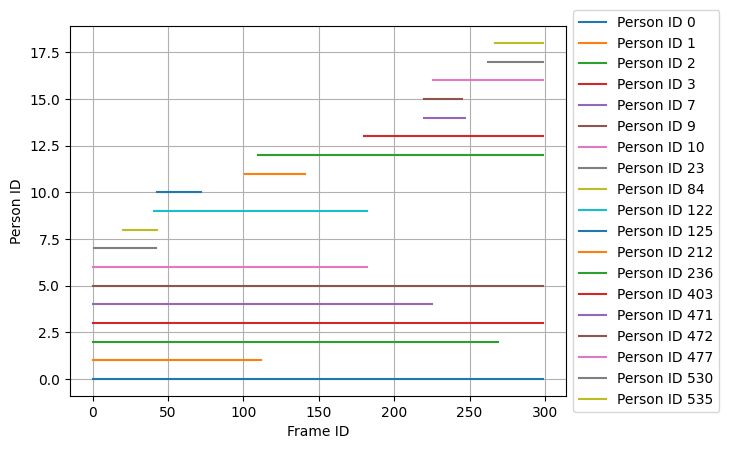

In [9]:

def get_all_person_ids(data):
    person_ids = []
    for frame in data.values():
        for person in frame:
            if person['id'] not in person_ids:
                person_ids.append(person['id'])
    return person_ids

def frames_ids_where_person_id_is(data, person_id):
    frame_ids = []
    for frame_id, frame in data.items():
        for person in frame:
            if person['id'] == person_id:
                frame_ids.append(frame_id)
                break
    return frame_ids
  
print(get_all_person_ids(data))
  
import matplotlib.pyplot as plt

def plot_where_persons_are_in_frames(data):
    pids = get_all_person_ids(data)
    idx_to_person_id = {idx: pid for idx, pid in enumerate(pids)}
    person_id_to_idx = {pid: idx for idx, pid in enumerate(pids)}
    for pid in pids:
        frames = frames_ids_where_person_id_is(data, pid)
        plt.plot(frames, [person_id_to_idx[pid]]*len(frames), label=f'Person ID {pid}')
    plt.xlabel('Frame ID')
    plt.ylabel('Person ID')
    #put legend on the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #grid on the background
    plt.grid()
    plt.show()
    
plot_where_persons_are_in_frames(data)



[125, 122, 212, 319, 49, 23, 84, 125, 471, 472, 530]


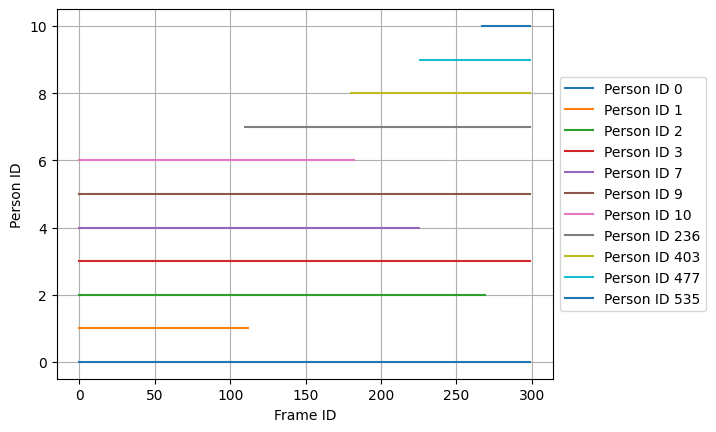

In [10]:
def remove_person(data, pids_to_remove):
    
    if not isinstance(pids_to_remove, list):
        pids_to_remove = [pids_to_remove]
        
    print(pids_to_remove)
    result = {}
    for frame_id, frame in data.items():
        result[frame_id] = []
        for person in frame:
            if person['id'] not in pids_to_remove:
                result[frame_id].append(person)
                
    return result


data_n = remove_person(data, [125,122,212,319,49,23,84,125,471,472,530])
plot_where_persons_are_in_frames(data_n)

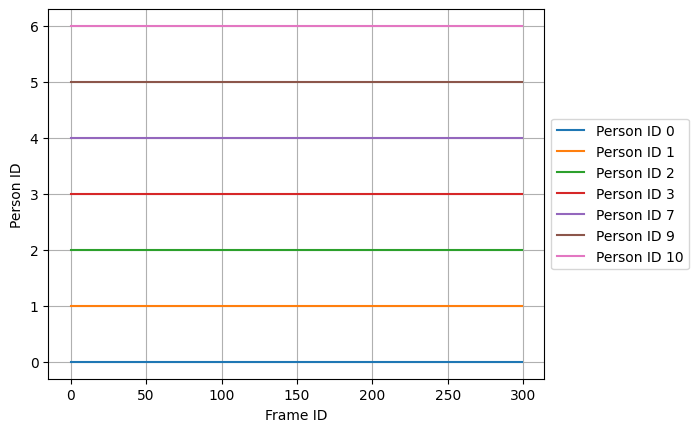

In [11]:
def get_all_person_ids_in_frame(data, frame_id):
    person_ids = []
    for person in data[frame_id]:
        person_ids.append(person['id'])
    return person_ids

def re_identify(data,person_orig, person_dup):
    new_data = {}
    for frame_id, frame in data.items():
        new_data[frame_id] = []
        pids = get_all_person_ids_in_frame(data, frame_id)
        for person in frame:
            if person['id'] == person_dup:
                if person_orig in pids:
                    continue # skip this person as it is already in the frame
                else:
                    person['id'] = person_orig
            new_data[frame_id].append(person)
    return new_data
            
data_n = re_identify(data_n, 1, 236)
data_n = re_identify(data_n, 10, 403)
data_n = re_identify(data_n, 2, 535) 
data_n = re_identify(data_n, 7, 477)

plot_where_persons_are_in_frames(data_n)

In [12]:
output_keypoints3d_folder = os.path.join(data_output_folder, 'wildtrack', 'output-keypoints3d', 'keypoints3d')
os.makedirs(output_keypoints3d_folder, exist_ok=True)
for frame_id, frame in data_n.items():
    frame_ = [{"id": person["id"],"keypoints3d":person['keypoints3d']} for person in frame]
    write_json(os.path.join(output_keypoints3d_folder, f'{frame_id:06d}.json'), frame_)

In [5]:
os.makedirs(os.path.join(data_output_folder, 'wildtrack', 'output-smpl-3d', 'smpl'), exist_ok=True)
for frame_id, frame in data_n.items():
    frame_ = [{"id": person["id"],"Rh":person['Rh'], "Th":person['Th'], "poses":person['poses'], "shapes":person['shapes']} for person in frame]
    write_json(os.path.join(data_output_folder, 'wildtrack', 'output-smpl-3d', 'smpl', f'{frame_id:06d}.json'), frame_)